In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv("../DATA/card_transdata.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


precentage of fraud id equal to 0.087403


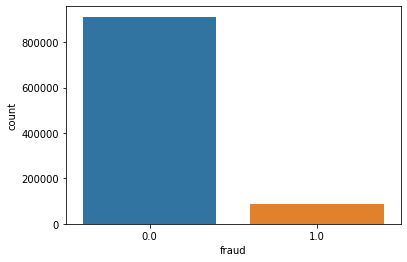

In [8]:
sns.countplot(data=data , x="fraud")
print ("precentage of fraud id equal to {}".format(data[data["fraud"]==1].shape[0]/data.shape[0]))

<AxesSubplot: xlabel='online_order', ylabel='count'>

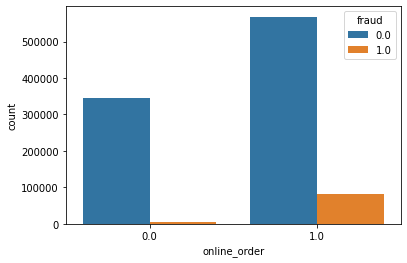

In [9]:
sns.countplot(data=data , x="online_order", hue = "fraud")

In [10]:
fraud_data = data[data["fraud"]==1]

In [11]:
N = fraud_data.shape[0]

online_fraud_percent = fraud_data[fraud_data["online_order"]==1 ].shape[0]/N  *100
print("online_fraud_percent : {} ".format(online_fraud_percent))

used_pin_number_fraud = fraud_data[fraud_data["used_pin_number"]==1 ].shape[0]/N  *100
print("used_pin_number_fraud: {} ".format(used_pin_number_fraud))

used_chip_fraud = fraud_data[fraud_data["used_chip"]==1 ].shape[0]/N  *100
print("used_chip_fraud : {} ".format(used_chip_fraud))

repeat_retailer_fraud = fraud_data[fraud_data["repeat_retailer"]==1 ].shape[0]/N  *100
print("repeat_retailer_fraud : {}".format(repeat_retailer_fraud))

online_fraud_percent : 94.63176321178906 
used_pin_number_fraud: 0.31234625813759254 
used_chip_fraud : 25.639852178986995 
repeat_retailer_fraud : 88.0118531400524


<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

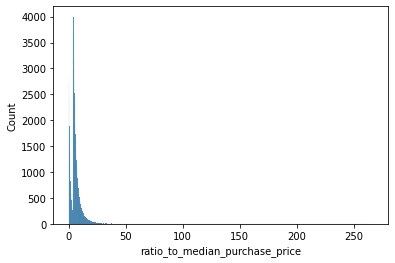

In [12]:
sns.histplot(data=fraud_data, x="ratio_to_median_purchase_price")

<AxesSubplot: xlabel='ratio_to_median_purchase_price', ylabel='Count'>

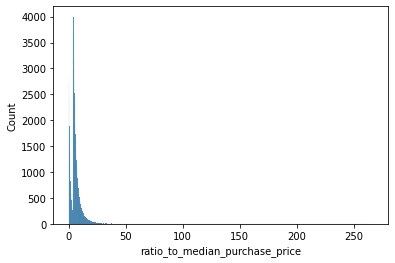

In [13]:
sns.histplot(data=data[data["fraud"]!=0]  , x="ratio_to_median_purchase_price")

In [14]:
corr=  data.corr()
corr # che khafan mizan vabastegi har columns ba digari 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [15]:
X = data.drop(columns= ["fraud"])
y= data.fraud

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = .4)

In [18]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((600000, 7), (400000, 7), (600000,), (400000,))

In [1]:
from sklearn.svm import SVC

In [2]:
clf = SVC() # vaghti data ziade kheyli tol mikeshe 
clf.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [21]:
np.sum(y==0) 

912597

In [23]:
np.random.randint(0,912597,fraud_data.shape)

array([[364401, 229464, 645469, ...,   4193,  76357, 463327],
       [866397,  89960, 798381, ..., 408833, 834048, 458645],
       [654873, 436571, 126598, ...,  15281, 624909, 226589],
       ...,
       [817754, 703080, 817154, ..., 404951, 149022, 368491],
       [605431, 463825, 703322, ...,  26077, 178138, 519554],
       [242508, 234142, 109757, ...,  69016, 504511, 548528]])

In [24]:
X.loc[y==0,:].iloc[np.random.randint(0,912597,fraud_data.shape[0])]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
146294,3.613402,0.339678,0.983079,1.0,1.0,0.0,1.0
694963,32.361691,1.474011,1.193220,1.0,0.0,0.0,0.0
874142,12.770290,0.128861,0.435626,1.0,0.0,0.0,1.0
245864,9.775579,0.435041,1.221894,1.0,0.0,0.0,1.0
680302,0.952869,0.481568,0.342981,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
117289,56.618325,2.454177,0.237909,1.0,0.0,0.0,1.0
621183,39.008042,0.401980,0.633273,1.0,0.0,0.0,1.0
919524,65.321226,0.716598,1.320581,1.0,0.0,0.0,1.0
706800,3.549521,4.865005,3.186449,1.0,0.0,0.0,0.0


In [25]:
import random 